<center><span style="font-size: 30px; font-weight: bold;">CryptoTrendPredictor</span></center>


**Objective**: Predict future prices of selected cryptocurrencies using machine learning and time series analysis.

**Scope**:

- Given the dataset size, we'll initially focus on the top 3 or 5 cryptocurrencies by market capitalization or popularity (like BTC, ETH, SOL).
- We'll employ a mix of traditional time series analysis techniques and machine learning models for our predictions.

### Data Loading & Initial Exploration

In [35]:
import pandas as pd
import numpy as np

In [36]:
metadata_path = "crypto/metadata.csv"
metadata_df = pd.read_csv(metadata_path)

metadata_df.head()

,Coin Pair Name,Coin Pair Symbol,File Path
0,Bitcoin USD,BTC-USD,BTC-USD.csv
1,Ethereum USD,ETH-USD,ETH-USD.csv
2,Tether USDt USD,USDT-USD,USDT-USD.csv
3,BNB USD,BNB-USD,BNB-USD.csv
4,USD Coin USD,USDC-USD,USDC-USD.csv


In [37]:
# Extract the file path for BTC-USD from the metadata 
btc_path = "crypto/data/" + metadata_df.loc[0, "File Path"]
btc_df = pd.read_csv(btc_path)

btc_df.head()

,Name,Symbol,Date,Open,High,Low,Close,Adj Close,Volume
0,Bitcoin USD,BTC-USD,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,Bitcoin USD,BTC-USD,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,Bitcoin USD,BTC-USD,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,Bitcoin USD,BTC-USD,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,Bitcoin USD,BTC-USD,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [38]:
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       3300 non-null   object 
 1   Symbol     3300 non-null   object 
 2   Date       3300 non-null   object 
 3   Open       3300 non-null   float64
 4   High       3300 non-null   float64
 5   Low        3300 non-null   float64
 6   Close      3300 non-null   float64
 7   Adj Close  3300 non-null   float64
 8   Volume     3300 non-null   int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 232.2+ KB


In [39]:
btc_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3.300000e+03
mean,13967.279486,14298.696919,13604.327835,13974.098204,13974.098204,1.647775e+10
std,15972.990624,16364.221477,15526.362368,15969.845366,15969.845366,1.929911e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,790.929001,799.686981,783.648758,792.242737,792.242737,1.378913e+08
50%,7990.629883,8197.218262,7787.211426,7988.358154,7988.358154,1.067972e+10
75%,21732.597168,22298.590820,21240.370117,21773.992676,21773.992676,2.715687e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


### Data Cleaning & Preprocessing


In [40]:
# Convert the Date column to datetime format
btc_df['Date'] = pd.to_datetime(btc_df['Date'])

# Sort the data by Date 
btc_df = btc_df.sort_values(by = 'Date')

# Check for missing values 
missing_values = btc_df.isnull().sum()

missing_values


Name         0
Symbol       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Exploratory Data Analysis (EDA)

##### Price Visualization

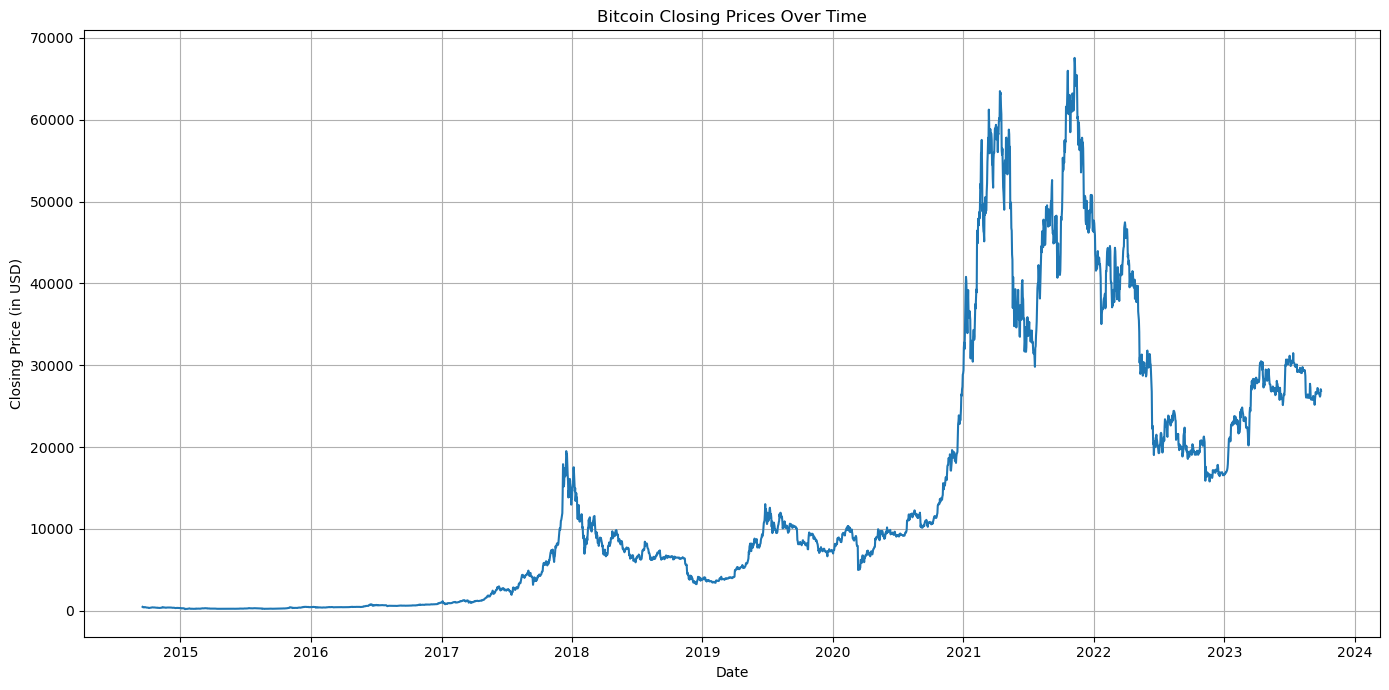

In [41]:
import matplotlib.pyplot as plt

# Plotting the closing prices
plt.figure(figsize = (14, 7))
plt.plot(btc_df['Date'], btc_df['Close'])
plt.title('Bitcoin Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (in USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

##### Volume Visualization

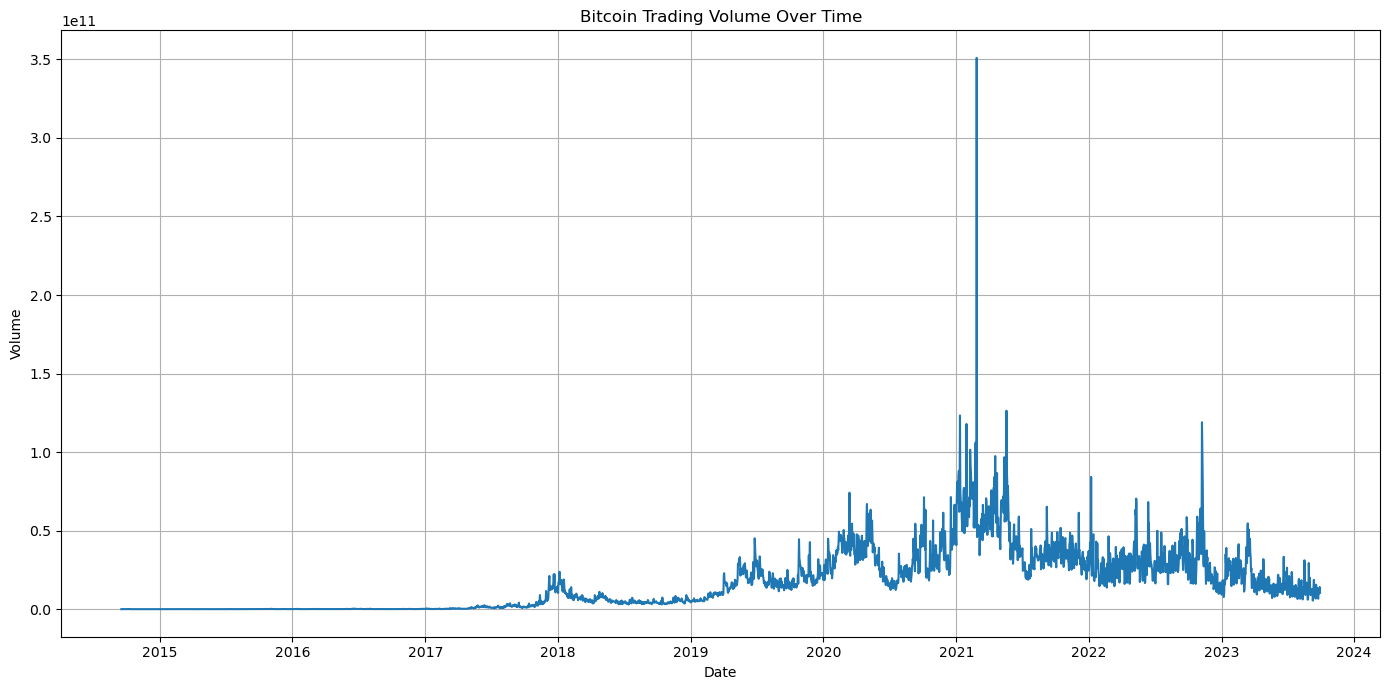

In [42]:
# Plotting the trading volume
plt.figure(figsize = (14, 7))
plt.plot(btc_df['Date'], btc_df['Volume'])
plt.title('Bitcoin Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.tight_layout()
plt.show()

### Data Transformation & Feature Engineering 

Given this is time series data, let's create some common features:

1. **Lagged Features**: These are past values that can be predictors for future values. For instance, the closing price from the previous day might be a good predictor of the closing price today.

2. **Rolling Averages**: A rolling average smoothens out short-term fluctuations and highlights longer-term trends.

3. **Historical Volatility**: The standard deviation of returns over a specific window, giving a sense of risk.

In [43]:
# 1. Lagged Features
btc_df['Lagged_Close'] = btc_df['Close'].shift(1) # Shift by 1 to get the previous day's closing price

# 2. Rolling Averages
btc_df['7_Day_Rolling_Avg'] = btc_df['Close'].rolling(window = 7).mean() # 7-day rolling average
btc_df['30_Day_Rolling_Avg'] = btc_df['Close'].rolling(window = 30).mean() # 30-day rolling average

# 3. Historical Volatility
btc_df['Log_Return'] = np.log(btc_df['Close'] / btc_df['Close'].shift(1))
btc_df['Historical_Volatility'] = btc_df['Log_Return'].rolling(window = 30).std() * np.sqrt(252) # Annualized Volatility 

btc_df.dropna(inplace = True) 

In [44]:
btc_df.tail()

,Name,Symbol,Date,Open,High,Low,Close,Adj Close,Volume,Lagged_Close,7_Day_Rolling_Avg,30_Day_Rolling_Avg,Log_Return,Historical_Volatility
3295,Bitcoin USD,BTC-USD,2023-09-25,26221.669922,26403.208984,26027.330078,26293.755859,26293.755859,12590824448,26571.429688,26708.452009,26311.219010,-0.010505,0.295626
3296,Bitcoin USD,BTC-USD,2023-09-26,26291.820312,26381.464844,26105.458984,26157.154297,26157.154297,9902080000,26293.755859,26557.841797,26313.467708,-0.005209,0.295937
3297,Bitcoin USD,BTC-USD,2023-09-27,26219.730469,26817.841797,26116.929688,26324.847656,26324.847656,11624476672,26157.154297,26440.001395,26320.757617,0.006391,0.296499
3298,Bitcoin USD,BTC-USD,2023-09-28,26365.085938,27224.787109,26328.013672,27062.492188,27062.492188,14131557376,26324.847656,26509.805525,26298.594271,0.027635,0.250707
3299,Bitcoin USD,BTC-USD,2023-09-29,27024.417969,27202.605469,26759.917969,26875.589844,26875.589844,10427141120,27062.492188,26552.094308,26284.538411,-0.006930,0.247483


### Time Series Split

When working with time series data, it's essential to split the data in chronological order rather than a random split because the order of data points matters.

We'll split the data into:

- **Training set**: Used to train our machine learning models.
- **Validation set**: Used to tune hyperparameters and make decisions about the model.
- **Test set**: Used to evaluate the model's performance on unseen data.

Let's define a 70-15-15 split for train-validation-test sets:

In [45]:
# Define the split sizes
train_size = int(0.7 * len(btc_df))
val_size = int(0.15 * len(btc_df))
test_size = int(0.15 * len(btc_df))

# Split the data
train = btc_df.iloc[:train_size] 
val = btc_df.iloc[:val_size]
test = btc_df.iloc[train_size + val_size:]

### Model Selection & Training

Given the nature of the data, we'll start with a simple **linear regression** model. It's a good starting point as it'll help us understand the relationship between our features and the target variable (future cryptocurrency price). Later, we can explore more complex models.

1. **Feature Selection**:
For this initial model, we'll use the Lagged_Close, 7_Day_Rolling_Avg, 30_Day_Rolling_Avg, and Historical_Volatility as our features and try to predict the Close price.

2. **Model Training**:
We'll use the LinearRegression model from scikit-learn.

Let's start with these steps:

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Features and target variable 
features = ['Lagged_Close', '7_Day_Rolling_Avg', '30_Day_Rolling_Avg', 'Historical_Volatility']
X_train = train[features]
y_train = train['Close']
X_val = val[features]
y_val = val['Close']

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions on the validation set
val_predictions = lr_model.predict(X_val)

# Calculate the Mean Squared Error on the validation set
mse = mean_squared_error(y_val, val_predictions)

print(f"Validation MSE: {mse}")

Validation MSE: 321.52022949524167


### Advanced Models & Hyperparameter Tuning

Now that we have a baseline model with Linear Regression, we can explore more complex models to see if they offer better performance. One such model suitable for time series data is the **Random Forest Regressor**. It's an ensemble learning method that fits a number of decision tree regressors on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [47]:
from sklearn.ensemble import RandomForestRegressor 

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)

# Train the model

rf_model.fit(X_train, y_train)

# Predictions on the validation set
val_rf_predictions = rf_model.predict(X_val)

# Calculate the Mean Squared Error on the validation set 
rf_mse = mean_squared_error(y_val, val_rf_predictions)

print(f"Validation MSE for Random Forest: {rf_mse}")

Validation MSE for Random Forest: 17.32194627239455


For Random Forest, some of the crucial hyperparameters to consider are:

- **n_estimators**: Number of trees in the forest.
- **max_depth**: Maximum depth of the trees.
- **min_samples_split**: Minimum number of samples required to split an internal node.
- **min_samples_leaf**: Minimum number of samples required to be at a leaf node.
To simplify the tuning process and save computational time, we'll use RandomizedSearchCV. This doesn't try out all possible combinations like GridSearchCV, but rather a fixed number of parameter settings sampled from the specified distributions.

In [48]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameters grid
param_dist = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]
}

# Randomized Search with cross-validation
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = param_dist, 
                               n_iter = 100, cv = 3, verbose = 2, random_state = 42, n_jobs = -1) 

# Fit the random search model
rf_random.fit(X_train, y_train)

# Print the best parameters
print(f"Best hyperparameters: {rf_random.best_params_}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best hyperparameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': None}


### Evaluating the Optimized Model

We'll now use the optimized Random Forest model (stored in rf_random.best_estimator_) to make predictions on the validation set. Then, we'll compute the Mean Squared Error (MSE) to gauge its performance:

In [49]:
# Using the best estimator for predictions on the validation set
best_rf_model = rf_random.best_estimator_
val_rf_predictions_optimized = best_rf_model.predict(X_val)

# Compute the Mean Squared Error on the validation set
rf_mse_optimized = mean_squared_error(y_val, val_rf_predictions_optimized)

print(f"Validation MSE for Optimized Random Forest: {rf_mse_optimized}")

Validation MSE for Optimized Random Forest: 55.782855378614954


In [50]:
X_test = test[features]
y_test = test['Close']

In [51]:
# Predictions on the test set
test_predictions = best_rf_model.predict(X_test)

# Calculate the Mean Squared Error on the test set
test_mse = mean_squared_error(y_test, test_predictions)

print(f"Test MSE for Random Forest: {test_mse: .2f}")

Test MSE for Random Forest:  9924753.62


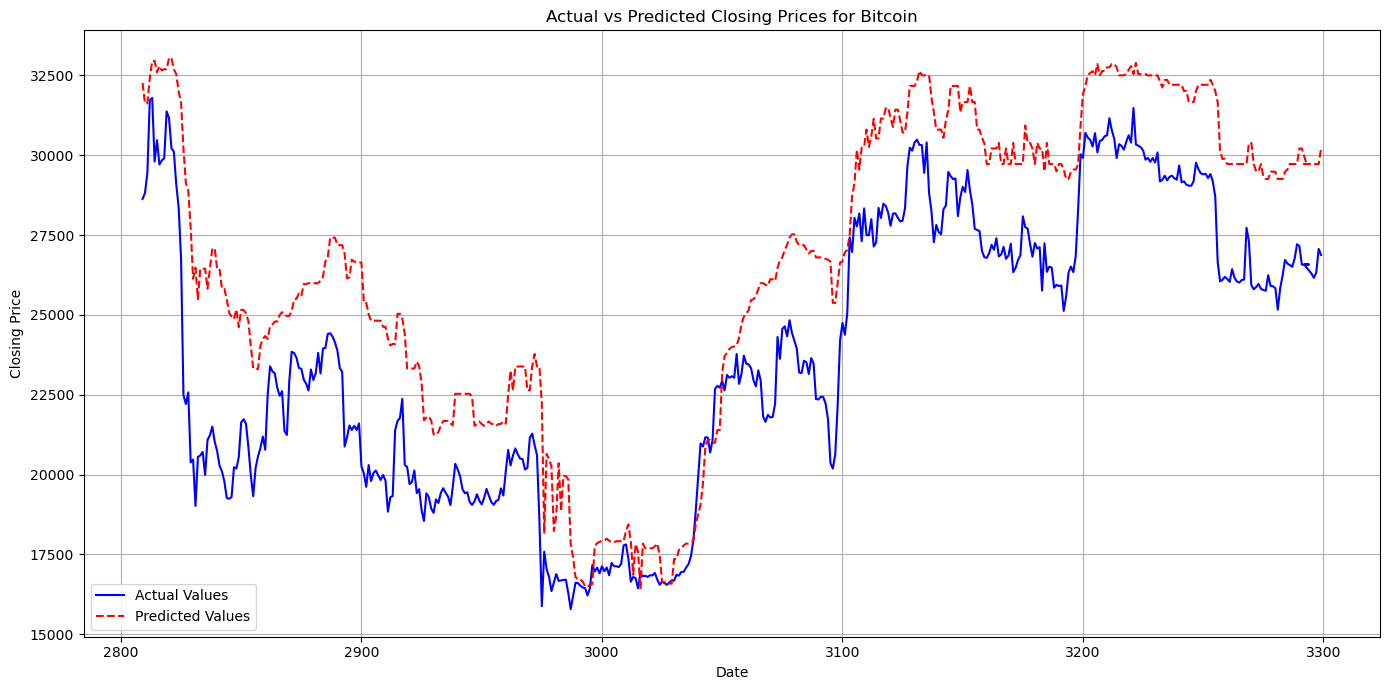

In [52]:
# Plotting the actual vs predicted values
plt.figure(figsize=(14,7))
plt.plot(test.index, y_test, label='Actual Values', color='blue')
plt.plot(test.index, test_predictions, label='Predicted Values', color='red', linestyle='dashed')
plt.title('Actual vs Predicted Closing Prices for Bitcoin')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()